# **Analyzing Transcripts in Resident Evil: The Actual Work**
## **Step 4: Analyzing the Data**
Once our data has been extracted, cleaned, and saved, we can finally start analyzing the transcripts. We'll do this using the [`os`](https://docs.python.org/3/library/os.html) module, the [`pandas`](https://pandas.pydata.org/) library, and the [`matplotlib`](https://matplotlib.org/) library.

If you read the `RE_Data_Setup.ipynb` notebook (or looked at the contents of the folder), you'll know that we saved our data into .csv files. For simplicity, we're going to combine all of the data stored in these .csv files into one large dataset, adding new columns called **Game** and **Year** to help us identify data sources. To do this task, we need to map each file to its corresponding game.

### Why didn't you lump everything together from the start?
Even though we're focused on analyzing *Resident Evil* data, we don't always need to compare all thirteen games against each other. Sometimes, we might want to focus on a specific subset of games (i.e. comparing *Resident Evil 2* (1998) to its remake (2019)). Splitting the dataset into multiple files makes it easier for us to manage the individual datasets.

In [29]:
import os
import pandas

# Copied and pasted from RE_Data_Setup.ipynb (Step 1)
def get_path_to_file(file: str) -> str:
    """Returns the path to a file in the working directory.
    Note that there is not error-checking, so the function will return a path
    even if the file doesn't exist within the working directory."""
    return os.path.realpath(file)

# Map each file to the appropriate game
file_list = {'RE0_Transcript.csv': 'Resident Evil 0',
             'RE1_Transcript.csv': 'Resident Evil 1',
             'RE2_Transcript.csv': 'Resident Evil 2',
             'RE2_Remake_Transcript.csv': 'Resident Evil 2 Remake',
             'RE3_Transcript.csv': 'Resident Evil 3',
             'RE3_Remake_Transcript.csv': 'Resident Evil 3 Remake',
             'REV_Transcript.csv': 'Resident Evil Code Veronica',
             'RE4_Transcript.csv': 'Resident Evil 4',
             'RE4_Remake_Transcript.csv': 'Resident Evil 4 Remake',
             'RE5_Transcript.csv': 'Resident Evil 5',
             'RE6_Transcript.csv': 'Resident Evil 6',
             'RE7_Transcript.csv': 'Resident Evil 7',
             'RE8_Transcript.csv': 'Resident Evil Village'
            }

# Map each game to a year
game_years = {'Resident Evil 0': 2002,
              'Resident Evil 1': 1996,
              'Resident Evil 2': 1998,
              'Resident Evil 3': 1999,
              'Resident Evil Code Veronica': 2000,
              'Resident Evil 4': 2005,
              'Resident Evil 5': 2009,
              'Resident Evil 6': 2012,
              'Resident Evil 7': 2017,
              'Resident Evil Village': 2021,
              'Resident Evil 2 Remake': 2019,
              'Resident Evil 3 Remake': 2020,
              'Resident Evil 4 Remake': 2023}

data_set = []
for file, game in file_list.items():
    temp = pandas.read_csv(get_path_to_file(file))
    temp['Game'] = game
    temp['Year'] = game_years[game]
    temp.insert(0, 'Game', temp.pop('Game')) # Shift the columns
    temp.insert(1, 'Year', temp.pop('Year'))
    data_set.append(temp)

re_data = pandas.concat(data_set, ignore_index = True)
re_data

,Game,Year,Character,Gender,Line
0,Resident Evil 0,2002,Narrator,NaN,A small mid-western town in America: Raccoon C...
1,Resident Evil 0,2002,Man,Male,Really?
2,Resident Evil 0,2002,Woman,Female,"Hmm, do you think so too?"
3,Resident Evil 0,2002,Bald Man,Male,Yeah.
4,Resident Evil 0,2002,White Man,Male,...do about it?
...,...,...,...,...,...
8560,Resident Evil Village,2021,Man,Male,We have a clear shot.
8561,Resident Evil Village,2021,Man In Black,Male,Stand down. I can handle it. She's just a kid.
8562,Resident Evil Village,2021,Rose,Female,"Way to keep it together, Rose."
8563,Resident Evil Village,2021,Man In Black,Male,"You're a lot like him, you know?"


Here are some questions we can try to answer with our large dataset.

## **Question 1: How often do female characters speak compared to male characters?**

In [30]:
# Count the frequencies within the dataset
re_gender_counts = re_data.groupby('Game')['Gender'].value_counts()
re_gender_counts

Game                         Gender
Resident Evil 0              Male      123
                             Female     92
Resident Evil 1              Male      391
                             Female    292
Resident Evil 2              Female    431
                             Male      306
Resident Evil 2 Remake       Female    505
                             Male      378
Resident Evil 3              Male      148
                             Female    114
Resident Evil 3 Remake       Male      241
                             Female    188
Resident Evil 4              Male      356
                             Female    112
Resident Evil 4 Remake       Male      753
                             Female    286
Resident Evil 5              Male      395
                             Female    284
Resident Evil 6              Male      876
                             Female    276
Resident Evil 7              Male      213
                             Female    159
Resident Evil Code

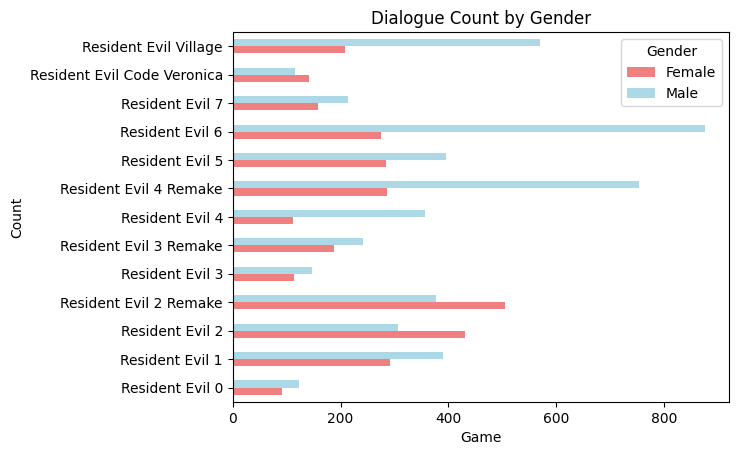

In [51]:
import matplotlib.pyplot as plt

gender_counts_pivot = re_gender_counts.unstack(fill_value = 0)
gender_counts_pivot.plot(kind = 'barh', stacked = False, 
                         color = ['LightCoral', 'LightBlue'])

plt.title('Dialogue Count by Gender')
plt.xlabel('Game')
plt.ylabel('Count')
plt.show()

## **How long do female characters speak compared to male characters**?

To answer this question, we need to remove emotes and actions (i.e. gasps) from the dialogue. We can achieve this using a regex; the one we used is `\(.*)`, which will capture any characters contained within a set of parentheses (including the parentheses themselves).

In [36]:
import re

def remove_stage_directions(line: str) -> str:
    ''' Removes stage directions 
        (phrases contained within parentheses). '''
    return re.sub("\(.*\)", '', line)

# Copy the data into a new dataframe
re_data_words = re_data
# Remove stage directions from the dataset
re_data_words['Line'] = re_data_words['Line'].apply(remove_stage_directions)
# Count the number of words in each character's dialogue
re_data_words['Words'] = re_data['Line'].apply(lambda x: len(x.split(' ')))
re_data_words

,Game,Year,Character,Gender,Line,Words
0,Resident Evil 0,2002,Narrator,NaN,A small mid-western town in America: Raccoon C...,100
1,Resident Evil 0,2002,Man,Male,Really?,1
2,Resident Evil 0,2002,Woman,Female,"Hmm, do you think so too?",6
3,Resident Evil 0,2002,Bald Man,Male,Yeah.,1
4,Resident Evil 0,2002,White Man,Male,...do about it?,3
...,...,...,...,...,...,...
8560,Resident Evil Village,2021,Man,Male,We have a clear shot.,5
8561,Resident Evil Village,2021,Man In Black,Male,Stand down. I can handle it. She's just a kid.,10
8562,Resident Evil Village,2021,Rose,Female,"Way to keep it together, Rose.",6
8563,Resident Evil Village,2021,Man In Black,Male,"You're a lot like him, you know?",7


In [42]:
re_word_counts = round(re_data_words.groupby(['Game', 'Gender'])['Words'].mean(), 2)
re_word_counts.dropna()
re_word_counts

Game                         Gender
Resident Evil 0              Female     6.57
                             Male       9.50
Resident Evil 1              Female     6.91
                             Male      10.09
Resident Evil 2              Female     9.16
                             Male       8.91
Resident Evil 2 Remake       Female     7.07
                             Male       7.70
Resident Evil 3              Female     7.65
                             Male      12.53
Resident Evil 3 Remake       Female     6.42
                             Male      12.29
Resident Evil 4              Female     6.64
                             Male       9.53
Resident Evil 4 Remake       Female     5.76
                             Male       7.90
Resident Evil 5              Female     7.81
                             Male       8.61
Resident Evil 6              Female     9.34
                             Male       9.06
Resident Evil 7              Female    11.16
                   

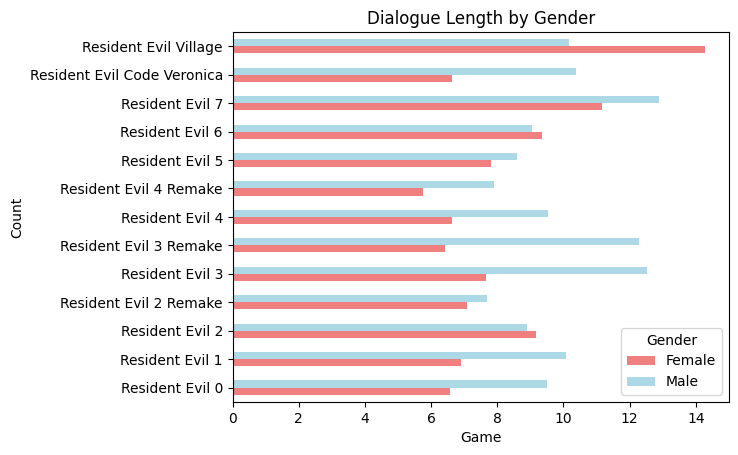

In [50]:
word_counts_pivot = re_word_counts.unstack(fill_value = 0)
word_counts_pivot.plot(kind = 'barh', stacked = False, 
                       color = ['LightCoral', 'LightBlue'])

plt.title('Dialogue Length by Gender')
plt.xlabel('Game')
plt.ylabel('Count')
plt.show()